# Real Example in Data Science for Reading external data and Plotting
Dataset from = [Esport Earning Data on Kaggle by Ran.Kirsh](https://www.kaggle.com/rankirsh/esports-earnings)

In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import CSV with ISO-8859-1 encoding
df = pd.read_csv('data/csv/HistoricalEsportData.csv', encoding = "ISO-8859-1")

In [3]:
df

,Date,Game,Earnings,Players,Tournaments
0,1/1/1998,QuakeWorld,15000.0,8,1
1,5/1/1998,Quake II,14600.0,4,1
2,7/1/1998,Quake II,15000.0,5,1
3,7/1/1998,QuakeWorld,6500.0,4,1
4,11/1/1998,Quake II,36600.0,13,2
...,...,...,...,...,...
6210,9/1/2020,Tetr.io,200.0,4,1
6211,9/1/2020,Beat Aim,160.0,7,2
6212,9/1/2020,Tetris,125.0,2,1
6213,9/1/2020,Rivals of Aether,50.0,4,1


In [4]:
df.name = 'Historical Esport Data 1998 - 2020'

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6215 entries, 0 to 6214
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         6215 non-null   object 
 1   Game         6215 non-null   object 
 2   Earnings     6215 non-null   float64
 3   Players      6215 non-null   int64  
 4   Tournaments  6215 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 194.3+ KB


In [6]:
df.shape

(6215, 5)

In [7]:
df.size

31075

In [8]:
df.dtypes

Date            object
Game            object
Earnings       float64
Players          int64
Tournaments      int64
dtype: object

In [9]:
# change column 'Date' dtype from object to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Game,Earnings,Players,Tournaments
0,1998-01-01,QuakeWorld,15000.0,8,1
1,1998-05-01,Quake II,14600.0,4,1
2,1998-07-01,Quake II,15000.0,5,1
3,1998-07-01,QuakeWorld,6500.0,4,1
4,1998-11-01,Quake II,36600.0,13,2


In [10]:
df.dtypes

Date           datetime64[ns]
Game                   object
Earnings              float64
Players                 int64
Tournaments             int64
dtype: object

In [11]:
df.describe()

,Earnings,Players,Tournaments
count,6.215000e+03,6215.000000,6215.000000
mean,1.407601e+05,50.310217,6.524859
std,9.577379e+05,115.961782,12.411488
min,0.000000e+00,0.000000,1.000000
25%,1.000000e+03,5.000000,1.000000
50%,8.776800e+03,15.000000,2.000000
75%,5.216008e+04,41.000000,6.000000
max,3.671356e+07,1699.000000,172.000000


In [12]:
# Set index to 'Date' because it will faster to access data information
df.set_index('Date', inplace=True)

In [13]:
df.head()

,Game,Earnings,Players,Tournaments
Date,,,,
1998-01-01,QuakeWorld,15000.0,8,1
1998-05-01,Quake II,14600.0,4,1
1998-07-01,Quake II,15000.0,5,1
1998-07-01,QuakeWorld,6500.0,4,1
1998-11-01,Quake II,36600.0,13,2


In [14]:
df.loc['1998-01-01'] # access by date

Game           QuakeWorld
Earnings            15000
Players                 8
Tournaments             1
Name: 1998-01-01 00:00:00, dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6215 entries, 1998-01-01 to 2020-09-01
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Game         6215 non-null   object 
 1   Earnings     6215 non-null   float64
 2   Players      6215 non-null   int64  
 3   Tournaments  6215 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 346.5+ KB


# Basic Plotting with pandas

In [16]:
per_million = pd.Series([1000], index=['Earnings'])

In [17]:
# change earnigs data into per thousands
df['Earnings'] = df / per_million

In [18]:
df['Earnings']

Date
1998-01-01       15
1998-05-01     14.6
1998-07-01       15
1998-07-01      6.5
1998-11-01     36.6
              ...  
2020-09-01      0.2
2020-09-01     0.16
2020-09-01    0.125
2020-09-01     0.05
2020-09-01    0.045
Name: Earnings, Length: 6215, dtype: object

<AxesSubplot:xlabel='Date'>

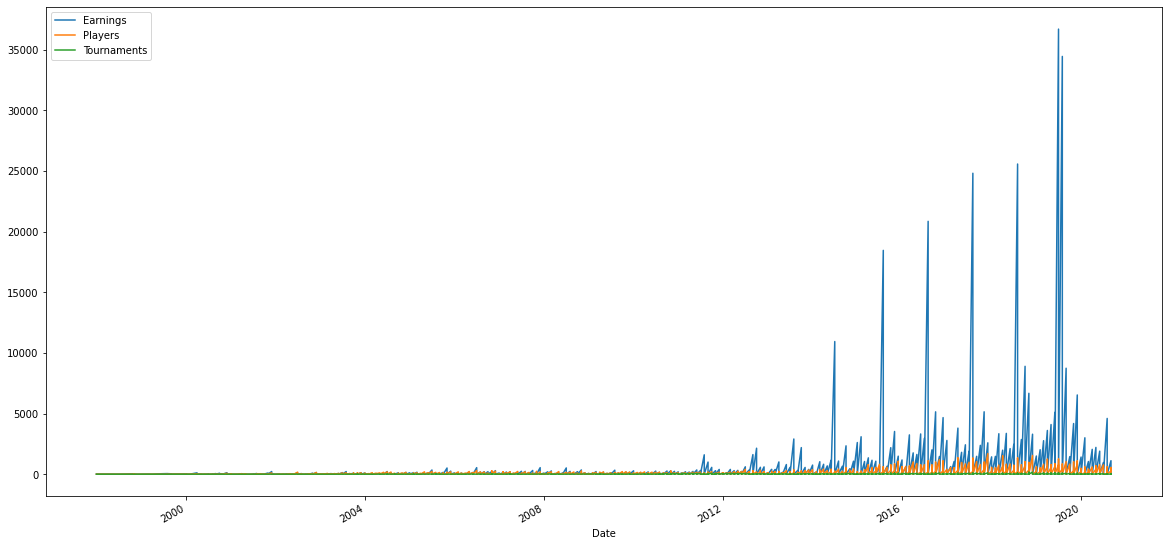

In [19]:
df.plot(figsize=(20,10)) # basic plotting

<AxesSubplot:xlabel='Date'>

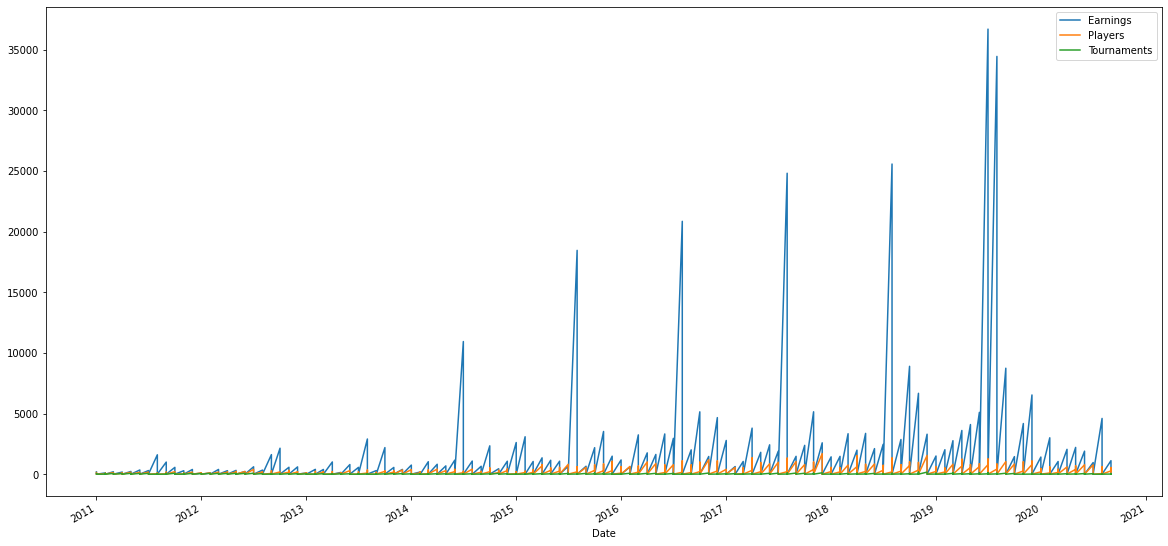

In [20]:
df.loc['2011-01-01':'2020-09-01'].plot(figsize=(20,10)) # plotting data from 1st January 2011 to most recent from data

<AxesSubplot:xlabel='Date'>

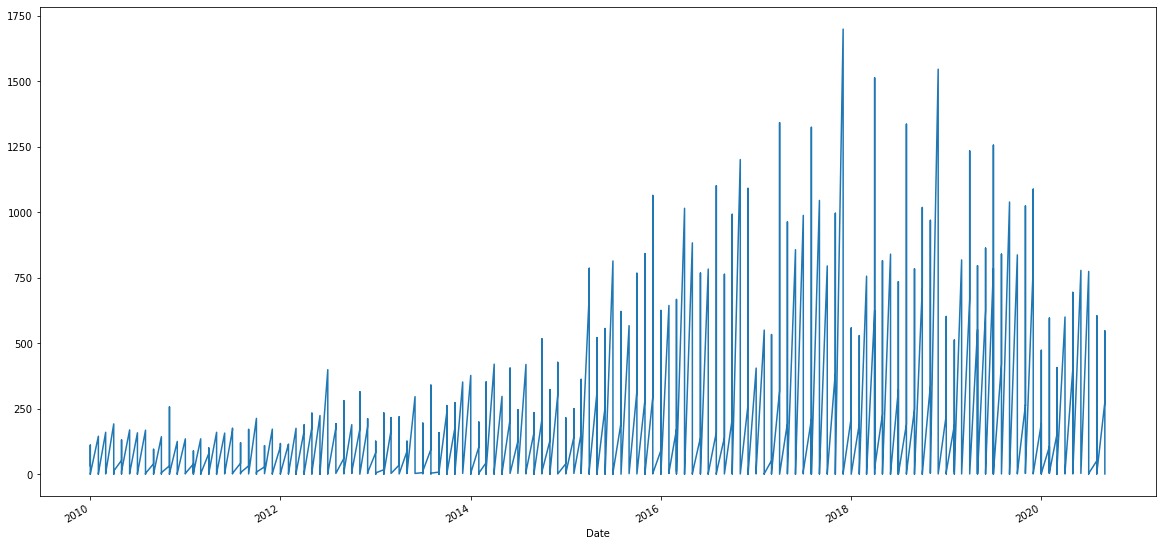

In [22]:
df.loc['2010-01-01':'2020-09-01', 'Players'].plot(figsize=(20,10))

In [23]:
df

,Game,Earnings,Players,Tournaments
Date,,,,
1998-01-01,QuakeWorld,15,8,1
1998-05-01,Quake II,14.6,4,1
1998-07-01,Quake II,15,5,1
1998-07-01,QuakeWorld,6.5,4,1
1998-11-01,Quake II,36.6,13,2
...,...,...,...,...
2020-09-01,Tetr.io,0.2,4,1
2020-09-01,Beat Aim,0.16,7,2
2020-09-01,Tetris,0.125,2,1


In [32]:
# create new column with empty data
df['Regions'] = np.nan

In [33]:
df

,Game,Earnings,Players,Tournaments,Regions
Date,,,,,
1998-01-01,QuakeWorld,15,8,1,NaN
1998-05-01,Quake II,14.6,4,1,NaN
1998-07-01,Quake II,15,5,1,NaN
1998-07-01,QuakeWorld,6.5,4,1,NaN
1998-11-01,Quake II,36.6,13,2,NaN
...,...,...,...,...,...
2020-09-01,Tetr.io,0.2,4,1,NaN
2020-09-01,Beat Aim,0.16,7,2,NaN
2020-09-01,Tetris,0.125,2,1,NaN


In [34]:
df.dtypes

Game            object
Earnings        object
Players          int64
Tournaments      int64
Regions        float64
dtype: object

(array([6.193e+03, 1.300e+01, 3.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([0.0, 3671.35559, 7342.71118, 11014.066770000001, 14685.42236,
        18356.77795, 22028.133540000003, 25699.48913, 29370.84472,
        33042.20031, 36713.5559], dtype=object),
 <BarContainer object of 10 artists>)

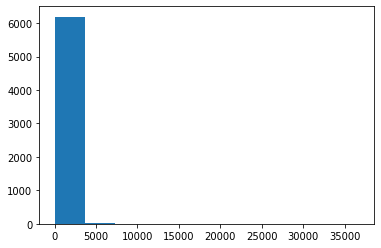

In [35]:
plt.hist(df['Earnings'])

In [40]:
# Displaying most esport tournament by Game
df['Game'].value_counts().head(20)

StarCraft: Brood War                205
WarCraft III                        198
Super Smash Bros. Melee             184
Age of Empires II                   160
Counter-Strike                      140
StarCraft II                        128
League of Legends                   120
Dota 2                              108
Team Fortress 2                     101
Counter-Strike: Global Offensive    100
Quake Live                           92
Super Smash Bros. Brawl              88
Counter-Strike: Source               84
Hearthstone                          82
Heroes of Newerth                    76
CrossFire                            74
Project M                            71
TrackMania 2: Stadium                69
Chess.com                            69
Ultimate Marvel vs. Capcom 3         64
Name: Game, dtype: int64

<AxesSubplot:ylabel='Game'>

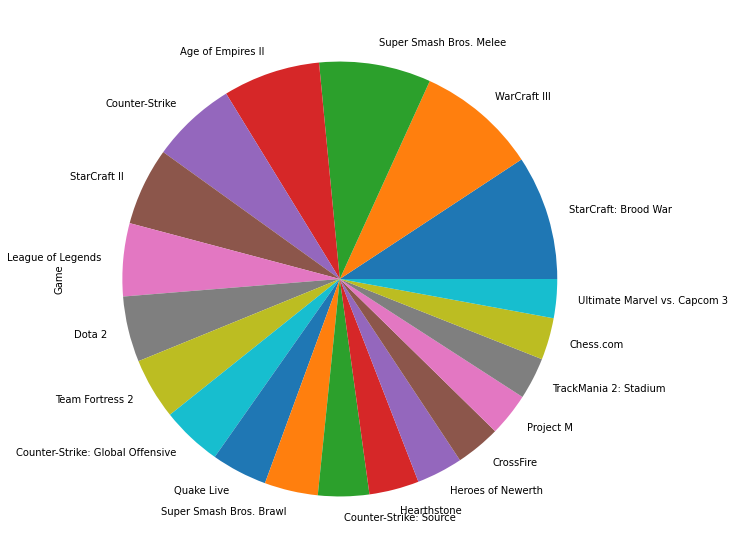

In [44]:
df['Game'].value_counts().head(20).plot(kind='pie', figsize=(10,10))

<AxesSubplot:>

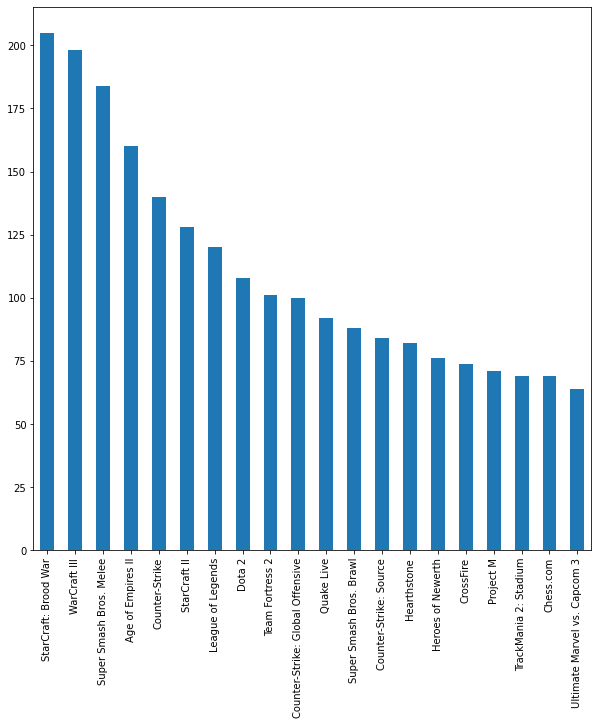

In [45]:
df['Game'].value_counts().head(20).plot(kind='bar', figsize=(10,10))

In [48]:
# fing a Game that has only 1 tournament
df['Game'].unique()

array(['QuakeWorld', 'Quake II', 'StarCraft: Brood War', 'Age of Empires',
       'Descent 3', 'Quake III Arena', 'Age of Empires II',
       'Marvel vs. Capcom 2', 'Street Fighter Alpha 2',
       'Street Fighter Alpha 3', 'Street Fighter III: 3rd Strike',
       'Super Street Fighter II Turbo', 'FIFA 2000', 'Counter-Strike',
       'Capcom vs. SNK', 'FIFA 2001', 'Unreal Tournament',
       'Aliens versus Predator 2', 'Super Smash Bros. Melee',
       'Return to Castle Wolfenstein', 'Capcom vs. SNK 2',
       'FIFA 2002 World Cup', 'Halo: Combat Evolved',
       'Unreal Tournament 2003', 'WarCraft III', 'NASCAR Thunder 2002',
       'Star Wars Jedi Knight II: Jedi Outcast', 'Tekken 4',
       'NASCAR Thunder 2003', 'FIFA 03', 'Guilty Gear XX',
       'Soul Calibur II', 'Tekken Tag Tournament',
       'Virtua Fighter 4: Evolution', 'Age of Mythology',
       'Gran Turismo 3: A-Spec', 'Madden NFL 2004', 'Live for Speed',
       'FIFA 04', 'Counter-Strike: Condition Zero',
       'Pro Ev